#### Lesson 13

* v1.0.0 2016.11 by David.Yi
* v1.1 2020.5 edit by David Yi


## 本次内容要点
* 访问网页
* 调用接口
* 思考一下

---

## requests 包

requests 包是 python 目前最好用的网站内容访问包，设计上比较人性化，可以大大简化代码的复杂度。

网络访问、接口调用、网络检查、互联网爬虫等，都离不开 requests 包。

一般来说，python 自带的函数包还是做的非常不错的，但是也有例外，其中之一就是网络访问方面。与其说是 python 原生的网络访问函数包做的不够人性化，不如说是 requests 函数包做的太人性化了，设计的非常好，配合 python 自带的优雅属性，在 python 的迅速发展过程中起到了正向的作用。requests 之后，也有很多函数包打着人性化的旗子，甚至有一些滥用了。

使用 requests 包之前需要安装 requests。

In [1]:
# 获得一个网站的信息

import requests

r = requests.get('http://www.huifu.com')
print(r.content)

b'<!DOCTYPE html>\n<html lang="zh-CN">\n<head>\n    <meta charset="utf-8">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n    <meta name="viewport" content="width=device-width, initial-scale=1, user-scalable=0" />\n    <meta name="format-detection" content="telphone=no, email=no"/>\n    <title>\xe6\xb1\x87\xe4\xbb\x98\xe5\xa4\xa9\xe4\xb8\x8b | \xe7\xa7\x91\xe6\x8a\x80\xe8\xae\xa9\xe6\x94\xaf\xe4\xbb\x98\xe6\x9b\xb4\xe6\x87\x82\xe4\xbd\xa0</title>\n    <link rel="shortcut icon" href="https://www.huifu.com/public/huifu-site/img/favicon.ico" />\n    <link href="https://www.huifu.com/public/huifu-site/css/style.css?ver=2020040302" rel="stylesheet"/>\n    <script src="https://www.huifu.com/public/huifu-site/js/jquery-3.3.1.min.js"></script>\n    <script src="https://www.huifu.com/public/huifu-site/js/main.js"></script>\n    <meta name="keywords" content="\xe6\xb1\x87\xe4\xbb\x98\xe5\xa4\xa9\xe4\xb8\x8b,\xe6\xb1\x87\xe4\xbb\x98\xe5\xa4\xa9\xe4\xb8\x8b\xe5\xae\x98\xe7\xb

In [2]:
print(r.headers)

{'Server': 'Tengine', 'Content-Type': 'text/html; charset=UTF-8', 'Content-Length': '10979', 'Connection': 'keep-alive', 'Date': 'Sun, 03 May 2020 01:46:11 GMT', 'Set-Cookie': 'acw_tc=65e3219915884703711235722e3431ee76833119f13c6b3a8f7a564f4b;path=/;HttpOnly;Max-Age=2678401', 'ALIWAF-CACHE': 'HIT', 'Ali-Swift-Global-Savetime': '1588470371', 'Via': 'cache40.l2cn1821[49,200-0,M], cache33.l2cn1821[50,0], vcache2.cn2539[82,200-0,M], vcache5.cn2539[86,0]', 'X-Cache': 'MISS TCP_MISS dirn:-2:-2', 'X-Swift-SaveTime': 'Sun, 03 May 2020 01:46:11 GMT', 'X-Swift-CacheTime': '0', 'Timing-Allow-Origin': '*', 'EagleId': '65e3219915884703711235722e'}


---

### 下载文件

使用requets 可以很方便的获得网站中的图片、文件等。下面只是简单的举例，下载 baidu 的 logo 文件。

In [3]:
# 下载文件 使用 requests
# baidu 的 logo 文件： http://home.baidu.com/resource/r/home/img/logo-yy.gif  

import requests

url = 'http://home.baidu.com/resource/r/home/img/logo-yy.gif'

r = requests.get(url)
with open("files/baidu_logo.gif", "wb") as code:
    code.write(r.content)
    print('download ok')

download ok


---

### 读取接口

我们来做一个读取新冠疫情数据的demo。

平时我们说的接口，可以简单的理解为满足一定的认证方式后，通过输入参数的值，获得需要的内容。认证方式、入参、出参这些都是事先约定的。包括接口文档、参数列表、自动联调等这些，在目前 python 的接口开发中都是可以自动生成的。python 本身开发接口非常容易，我们另外专门讲述。相对来说，读取调用接口更为常见。

In [12]:
# demo for infection/region
# input region, start_date, then get data
# 接口：感染/国家地区

import requests

# API url
url = 'https://covid-19.adapay.tech/api/v1/'
# token, can call register function get the API token
token = '497115d0c2ff9586bf0fe03088cfdbe2'

# region or country
region='US'

# headers, need the API token
headers = {
    'token': token
}

# the params
payload = {
    'region': region,
    'start_date':'2020-04-24'
}

# call requets to load 
r = requests.get(url+'infection/region', params=payload, headers=headers)

data = r.json()

print(data)

print(type(data))

{'code': '90000', 'message': 'success', 'data': {'region': {'US': {'2020-04-24': {'confirmed_add': 36163, 'deaths_add': 1995, 'recovered_add': 18876, 'confirmed': 905284, 'deaths': 51949, 'recovered': 99079}}}}}
<class 'dict'>


In [14]:
# 获得指定key 的内容，实际上是字典，因此可以一层层嵌套访问

print(data['data']['region']['US']['2020-04-24']['confirmed'])

905284


In [16]:
# 我们模拟一个实际的使用方式，获得10天的数据

# demo for infection/region
# input region, start_date, end_date, then get data
# 接口：感染/国家地区

import requests

# API url
url = 'https://covid-19.adapay.tech/api/v1/'
# token, can call register function get the API token
token = '497115d0c2ff9586bf0fe03088cfdbe2'

# region or country
region='US'

# headers, need the API token
headers = {
    'token': token
}

# the params
payload = {
    'region': region,
    'start_date':'2020-04-24',
    'end_date':'2020-05-03'
}

# call requets to load 
r = requests.get(url+'infection/region', params=payload, headers=headers)

data = r.json()

print(data)

{'code': '90000', 'message': 'success', 'data': {'region': {'US': {'2020-04-24': {'confirmed_add': 36163, 'deaths_add': 1995, 'recovered_add': 18876, 'confirmed': 905284, 'deaths': 51949, 'recovered': 99079}, '2020-04-25': {'confirmed_add': 32821, 'deaths_add': 1806, 'recovered_add': 1293, 'confirmed': 938105, 'deaths': 53755, 'recovered': 100372}, '2020-04-26': {'confirmed_add': 27629, 'deaths_add': 1126, 'recovered_add': 6616, 'confirmed': 965734, 'deaths': 54881, 'recovered': 106988}, '2020-04-27': {'confirmed_add': 22414, 'deaths_add': 1378, 'recovered_add': 4436, 'confirmed': 988148, 'deaths': 56259, 'recovered': 111424}, '2020-04-28': {'confirmed_add': 24385, 'deaths_add': 2096, 'recovered_add': 4512, 'confirmed': 1012533, 'deaths': 58355, 'recovered': 115936}, '2020-04-29': {'confirmed_add': 27327, 'deaths_add': 2612, 'recovered_add': 4784, 'confirmed': 1039860, 'deaths': 60967, 'recovered': 120720}, '2020-04-30': {'confirmed_add': 29515, 'deaths_add': 2029, 'recovered_add': 332

In [51]:
# 截取需要的字典内容
dict1 = data['data']['region']['US']
print(dict1)

print('---')

# 根据字典进行遍历
list1 = []
list2 = []
for key, value in dict1.items():
    print(key,value)
    list1.append(value['confirmed'])
    list2.append(key[5:10])
    
print('---')
print(list1)

print('---')
print(list2)


{'2020-04-24': {'confirmed_add': 36163, 'deaths_add': 1995, 'recovered_add': 18876, 'confirmed': 905284, 'deaths': 51949, 'recovered': 99079}, '2020-04-25': {'confirmed_add': 32821, 'deaths_add': 1806, 'recovered_add': 1293, 'confirmed': 938105, 'deaths': 53755, 'recovered': 100372}, '2020-04-26': {'confirmed_add': 27629, 'deaths_add': 1126, 'recovered_add': 6616, 'confirmed': 965734, 'deaths': 54881, 'recovered': 106988}, '2020-04-27': {'confirmed_add': 22414, 'deaths_add': 1378, 'recovered_add': 4436, 'confirmed': 988148, 'deaths': 56259, 'recovered': 111424}, '2020-04-28': {'confirmed_add': 24385, 'deaths_add': 2096, 'recovered_add': 4512, 'confirmed': 1012533, 'deaths': 58355, 'recovered': 115936}, '2020-04-29': {'confirmed_add': 27327, 'deaths_add': 2612, 'recovered_add': 4784, 'confirmed': 1039860, 'deaths': 60967, 'recovered': 120720}, '2020-04-30': {'confirmed_add': 29515, 'deaths_add': 2029, 'recovered_add': 33227, 'confirmed': 1069375, 'deaths': 62996, 'recovered': 153947}, '

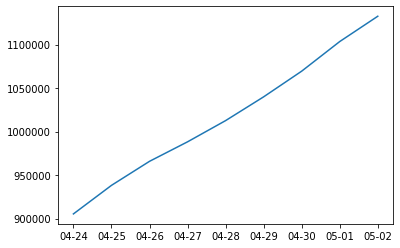

In [52]:
# 绘制一个折线图

import matplotlib.pyplot as plt
 
plt.plot(list2,list1)
plt.show()